In [1]:
##Arboles de decisión

In [3]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
data.shape

(1599, 12)

In [19]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

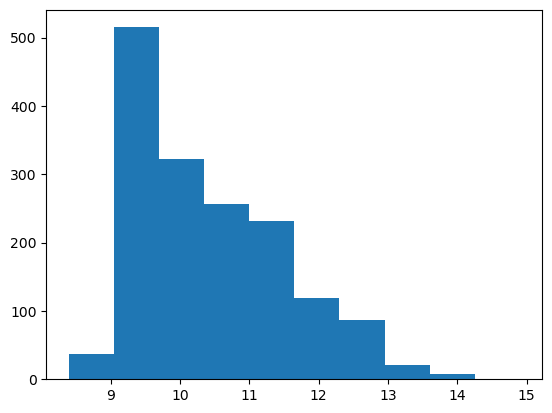

In [25]:
plt.hist(data.alcohol)

Tome el dato del alcohol para evidenciar el balance del dataset en el histograma.

<Axes: xlabel='alcohol', ylabel='quality'>

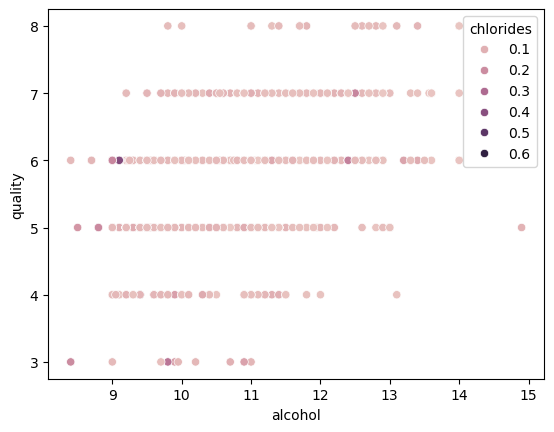

In [30]:
sns.scatterplot(x = "alcohol", y = "quality", hue = "chlorides", data = data)

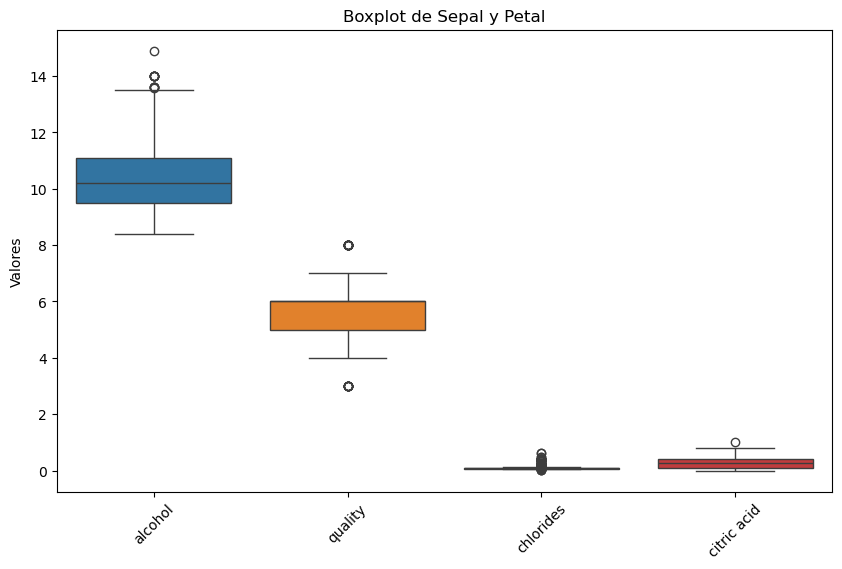

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['alcohol', 'quality', 'chlorides', 'citric acid']])
plt.xticks(rotation=45)
plt.title('Boxplot de Sepal y Petal')
plt.ylabel('Valores')
plt.show()

In [40]:
predictors_col = ["alcohol", "quality", "chlorides", "citric acid"]
target_col = ['density']

In [42]:
predictors = data[predictors_col]
target = data[target_col]

In [44]:
predictors

,alcohol,quality,chlorides,citric acid
0,9.4,5,0.076,0.00
1,9.8,5,0.098,0.00
2,9.8,5,0.092,0.04
3,9.8,6,0.075,0.56
4,9.4,5,0.076,0.00
...,...,...,...,...
1594,10.5,5,0.090,0.08
1595,11.2,6,0.062,0.10
1596,11.0,6,0.076,0.13
1597,10.2,5,0.075,0.12


In [46]:
target

,density
0,0.99780
1,0.99680
2,0.99700
3,0.99800
4,0.99780
...,...
1594,0.99490
1595,0.99512
1596,0.99574
1597,0.99547


In [48]:
corr = predictors.corr()
corr

,alcohol,quality,chlorides,citric acid
alcohol,1.000000,0.476166,-0.221141,0.109903
quality,0.476166,1.000000,-0.128907,0.226373
chlorides,-0.221141,-0.128907,1.000000,0.203823
citric acid,0.109903,0.226373,0.203823,1.000000


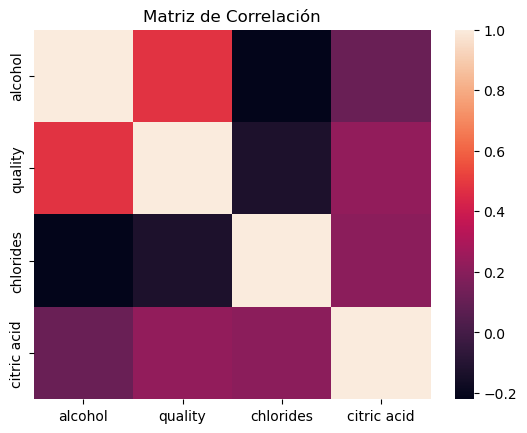

In [82]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

Desde está instancia los codigos no aplican para el ejercicio del Vino.